<br><br><font color="gray">DOING COMPUTATIONAL SOCIAL SCIENCE<br>MODULE 8 <strong>PROBLEM SETS</strong></font>

# <font color="#49699E" size=40>Social Network Analysis</font>
This module notebook assignment is organized into two parts. 

- **[PART A](#SECAEP) (Accompanying Chapter 18, "Social Networks and Relational Thinking")**
    - [Exercises and Practice Problems](#SECAEP) (All students)
- **[PART B](#SECBEP) (Accompanying Chapter 19, "Centrality"**)
    - [Exercises and Practice Problems](#SECBEP) (All students)
- **[PART C](#SECCEP) (Accompanying Chapter 20, "Connection, Cohesion, and Equivalence"**)
    - [Exercises and Practice Problems](#SECBEP) (All students)

# What You Need to Know Before Getting Started

- **You can consult any resources you want when completing these exercises and problems**. Just as it is in the "real world:" if you can't figure out how to do something, look it up. My recommendation is that you check the relevant parts of the assigned reading or search for inspiration on [https://stackoverflow.com](https://stackoverflow.com).
- **Each problem is worth 1 point**. All problems are equally weighted.
- **The information you need for each problem set is provided in the blue and green cells.** General instructions / the problem set preamble are in the blue cells, and instructions for specific problems are in the green cells. **You have to execute all of the code in the problem set, but you are only responsible for entering code into the code cells that immediately follow a green cell**. You will also recognize those cells because they will be incomplete. You need to replace each `____` with the code that will make the cell execute properly.
- **The comments in the problem cells contain clues indicating what the following line of code is supposed to do.** Use these comments as a guide when filling in the blanks. 
- **Each problem cell stores one object named according to the problem (e.g. _09)**. These are not important for you, but we use them to help grade your work efficiently, so **do not delete them or change their names**. If you do, you will lose marks.
- **You can ask for help**. If you run into problems, you can reach out to John (john.mclevey@uwaterloo.ca) or Pierson (pbrowne@uwaterloo.ca) for help. You can ask a friend for help if you like, regardless of whether they are enrolled in the course.

Finally, remember that you do not need to "master" this content before moving on to other course materials, as what is introduced here is reinforced throughout the rest of the course. You will have plenty of time to practice and cement your new knowledge and skills.

# How to Submit Your (Pickled) Assignment! 

Since we've had to rethink the way we deliver, collect, and evaluate these problem sets, we want to be very clear about what you need to do to properly submit this module notebook assignment. Please read the following explanation of our process so that you understand how this works, and what you need to do.

At the very end of this notebook, there is a code cell that will compile all of your answers to every problem in the assignment and save them as a 'pickle' file (`.pkl`) in the current working directory. You can execute that cell as many times as you like. Each time you run it, it will overwrite the old pickle with your updated answers. **Once you've ensured that everything in the notebook is complete and finished to your satisfaction, it's up to you to get the pickle that you just created and upload it to the appropriate Learn dropbox for this module.** The file you are looking for will not exist until you run the cells at the end of the notebook. Once it has been created, it will follow this naming convention: 

> `module_[number]__student_[your_student_number].pkl`

To be very clear, **you need to submit the pickle to Learn**. You do not need to upload the Jupyter Notebook as initially planned. **Just the pickle!**

## Make Sure Everything is Good to Go

It's generally a good idea to do a 'fresh' run of your entire notebook before you submit your assignment to make sure that everything is working as it should be. You can use the button with the 'Fast-Forward' arrows in the Jupyter toolbar above to restart the kernel (resetting everything to initial conditions) and running every code cell in the notebook, in order. You can also select 'Restart and Run All' from the Kernel dropdown menu. If the entire notebook runs without throwing any errors, you should be good to go!

If you're running into issues, make sure that you haven't changed any of the 'answer' variable names we provided you with (e.g., we asked you to store your answer to the first question in a variable called `_01`). If you change an answer's variable name or don't store your answer in that variable, the project won't finalize properly and you won't get proper credit for your work. The same goes for the `student_id` metadata variable we ask you to complete immediately below; if any of those are missing, haven't been filled in properly, or have been renamed, issues may arise during the grading process and you will not receive proper credit. So make sure you enter your student information, and don't delete or change the names of the variables that store your answers to each problem!

## IMPORTANT: ADD YOUR STUDENT ID NUMBER

<div class="alert alert-block alert-danger">
To evaluate your work, we need you to provide your student number. In the cell below, <strong>replace '12345678' with your student number</strong>. The student_id' variable needs to be an integer, so <strong>do not wrap it in quotes.</strong>
</div>

In [3]:
# Your UWaterloo student ID number
student_id = 20611274 

## Package Imports

In [4]:
import networkx as nx
from matplotlib import pyplot as plt
from pprint import pprint
import community
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy

# <font color="#49699E">PREAMBLE</font>

<div class="alert alert-block alert-info">

Just as in Module 5, you're not going to be able to find all of the answers in the course readings. Chapters 18, 19, and 20 will get you most of the way there, but they won't be enough by themselves. At several points, you're going to be required to delve into the <code>networkx</code> documentation to find methods that will be crucial to the tasks contained in this assignment. We'll provide you with a link to the <code>networkx</code> documentation, but don't be afraid to use a regular web search; something as simple as 'networkx karate' might be all you need!
</div>

<code>networkx</code> Documentation: https://networkx.org/documentation/stable/reference/index.html

# <font color="#49699E">PART A | CHAPTER 18</font>
<a id="SECAEP"></a>

## Question 1:
<div class="alert alert-block alert-info">  
Since our first chapter on social network analysis is more conceptual than computational, we're going to start out by giving you an opportunity to familiarize yourself with network methods <i>using your own social network</i>! We'll do this in two phases. In the first phase, you're going to create a python dictionary and populate it with the names of the friends and family you've interacted with (define 'interacted' however you like) over the past calendar month. In the second phase, you're going to think through all of the people you included in your ego network and add links between those who interacted directly with one another. The end result will be an ego network!
</div>
<div class="alert alert-block alert-success">
Populate a python dictionary with key-value pairs, where each key is the name of either yourself or someone in your ego network, and each value is a list of names corresponding to the others in your ego network that the key has interacted with over the past month. Don't include any more than 20 names in this network (although the same name can appear more than once, so there may be more than 20 lines in your dictionary). You don't need to include both sides of a network tie (i.e. <code>{"Me": ["My Dog", "My Cat"]}</code> is enough to build a two-way tie between me and my cat; I DON'T need to then create an entry like <code>{"My Cat": ["Me"]}</code>, although doing so won't do any harm). Be sure to remove all of the Simpsons references from the final product. Submit your Simpsons-free dictionary-based ego network. 
</div>

In [5]:
#_01

# Create your ego network, starting by entering your own name
# as a key, and using a list of names as the value
my_ego_net = {
    
    # For this example, we'll use Lisa as our ego.
    "Lisa Simpson": [
        "Bart Simpson", 
        "Homer Simpson", 
        "Marge Simpson", 
        "Maggie Simpson",
        "Professor Frink",
        "Dr. Nick",
        "Ralph Wiggum",
        "Chief Wiggum",
    ],
    
    # Lisa tries to think about the interactions those 
    # in her ego net have had lately...
    "Ralph Wiggum": [
        "Bart Simpson",
        "Chief Wiggum",
    ],
    
    "Chief Wiggum": [
        "Dr. Nick"
    ],
    
    # Lisa knows Bart and Ralph have interacted,
    # but there's no need for another tie here because
    # it's already covered in Ralph's entry
    "Bart Simpson": [
        "Homer Simpson",
        "Marge Simpson",
        "Maggie Simpson",
    ],
    
    "Marge Simpson": [
        "Homer Simpson",
        "Maggie Simpson"
    ],
    
    "Homer Simpson": [
        "Maggie Simpson"
    ],
}

# Store the result in the assignment variable
_01 = my_ego_net # do not change this variable name

## Question 2:
<div class="alert alert-block alert-info">  
The dictionary layout we used in the question above was simply for the sake of convenience; now, it's time to load the information we generated above into a <code>networkx</code> object. We're going to give you lots of leeway as to how you accomplish this (the <code>networkx</code> documentation will be your friend here), but you should know that there IS a way to do it in just one line of code!  
</div>
<div class="alert alert-block alert-success">
Use your python coding skills to convert your ego network dictionary into a networkx object that contains all of the same nodes and edges.
</div>

In [6]:
#_02

# Convert your ego network into networkx format
nx_ego = nx.convert.to_networkx_graph(my_ego_net)

# Store the result in the assignment variable
_02 = nx_ego # do not change this variable name

## Question 3:
<div class="alert alert-block alert-info">  
One useful aspect of ego networks is that they tend to be easy to visualize. We're going to do that now: you might find some the overall structure somewhat surprising!
</div>
<div class="alert alert-block alert-success">
Visualize your networkx-based ego network using a Fruchtermann-Reingold layout. Submit your visualization.
</div>

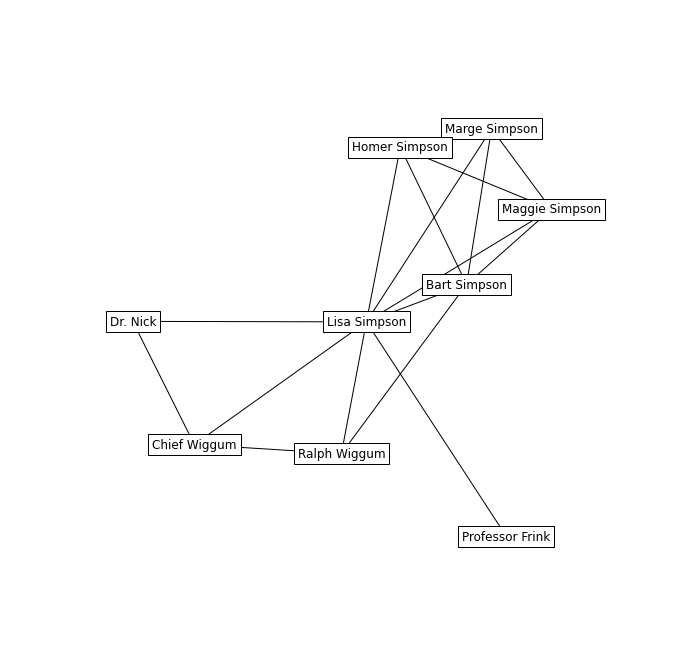

In [7]:
#_03

# Choose the layout for your ego network
pos = nx.fruchterman_reingold_layout(nx_ego, seed=42)

fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_labels(
    nx_ego, 
    pos,
    ax=ax,
    bbox = {"ec": "k", "fc":"white"}
)

nx.draw(
    nx_ego, 
    pos,
    ax=ax,
    node_color="white",
)

ax.margins(0.3)

# Store the result in the assignment variable
_03 = fig # do not change this variable name

## Question 4:
<div class="alert alert-block alert-info">  
We're going to be a little cruel with this question: rather than simply answering a single query, we're going to ask you to answer 2 different questions and package your answers together in a tuple. Fortunately for you, the answers should be pretty simple to acquire using <code>networkx</code> methods! (You may wish to consult the <code>networkx</code> documentation)
</div>
<div class="alert alert-block alert-success">
Submit a tuple containing answers to the following two queries:<br><br>
<ol>
    <li>Is your ego network directed?</li>
    <li>Is your ego network weighted?</li>

</ol>
</div>

In [8]:
#_04

# Is your ego network directed? (True/False)
query_1 = nx_ego.is_directed()
# Is your ego network weighted? (True/False)
query_2 = nx.is_weighted(nx_ego)

print(query_1, query_2)

# Store the result in the assignment variable
_04 = (query_1, query_2) # do not change this line

False False


# <font color="#49699E">PART B | CHAPTER 19</font>
<a id="SECBEP"></a>

<div class="alert alert-block alert-info">  
    
For all of the questions in parts B and C of this assignment, we're going to be working with Wayne W. Zachary's Karate Club dataset. Zachary collected this data in the context of a 3 year anthropological ethnography in the early 1970s. During that period, the nodes in the network were involved in a heated disagreement over how much to charge for karate lessons and how to compensate the instructor. This evolved into an intense political conflict that divided the club into two factions. Over time, the factionalized structure of the network was exacerbated by the informal flow of information through friendship networks, leading each faction to know less about the other and less about what they had in common over time, until eventually the club split into two clubs. On the basis of this work, Zachary proposed a (then) new mathematical model of how network structures shape the diffusion of political information, and how conflicts unfold in small groups over time.<br>
    
In the karate club network, the nodes are members of a university-based karate club and the edges represent their friendships with one another. The numbers are simply integer IDs that represent each node, which is a common practice for anonymizing data. The integer IDs have no quantitative meaning here.  </div>

## Question 5:
<div class="alert alert-block alert-info">  
We're going to start this section off with a brief introduction to the Karate Club dataset. Even though it isn't necessary to answer the question properly, we're going to produce a visualization of the club. Then, we're going to find all of the shortest paths between two members of the club who occupy mutually distant positions in the network.
</div>
<div class="alert alert-block alert-success">
Load the Karate Club dataset, which is included in the NetworkX package by default (use the NetworkX documentation to help you figure out which function to use). We've included the code that will produce a visualization of the network (provided you can supply the function necessary to lay it out using Fruchterman Reingold, as above), but the visualization is just for your benefit. <br>
    
Find all of the shortest paths between node 16 and node 22. Sort and submit it as a list of lists, which is how <code>networkx</code> outputs the paths from the generator by default.
</div>

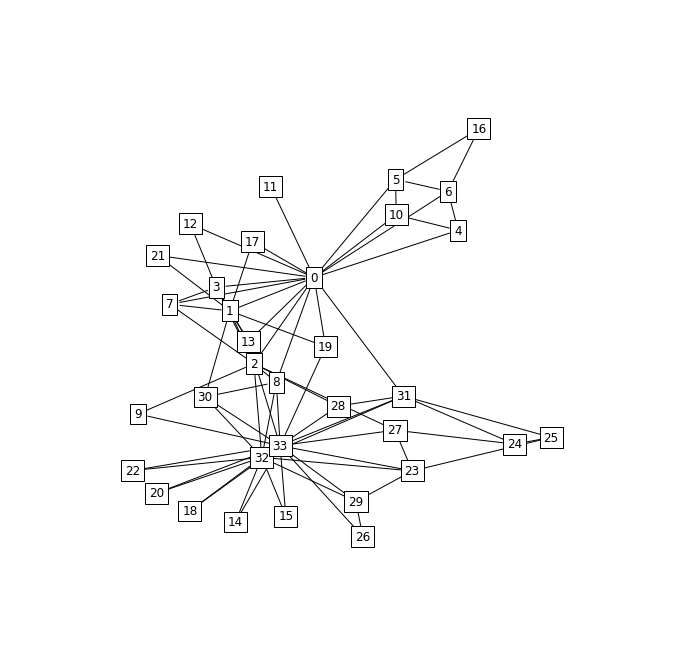

[[16, 5, 0, 2, 32, 22],
 [16, 5, 0, 8, 32, 22],
 [16, 5, 0, 8, 33, 22],
 [16, 5, 0, 13, 33, 22],
 [16, 5, 0, 19, 33, 22],
 [16, 5, 0, 31, 32, 22],
 [16, 5, 0, 31, 33, 22],
 [16, 6, 0, 2, 32, 22],
 [16, 6, 0, 8, 32, 22],
 [16, 6, 0, 8, 33, 22],
 [16, 6, 0, 13, 33, 22],
 [16, 6, 0, 19, 33, 22],
 [16, 6, 0, 31, 32, 22],
 [16, 6, 0, 31, 33, 22]]


In [7]:
#_05

# Load Karate Club Graph
karate_net = nx.karate_club_graph()

# Visualize Karate Club Graph (Optional)
pos = nx.fruchterman_reingold_layout(karate_net, seed=42)
fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_labels(
    karate_net, 
    pos,
    ax=ax,
    bbox = {"ec": "k", "fc":"white"}
)
nx.draw(
    karate_net, 
    pos,
    ax=ax,
    node_color="white",
)
ax.margins(0.3)
plt.show()

# Store all shortest paths (each of which is a list) in a list and sort that list
shortest_paths = sorted(list(nx.all_shortest_paths(karate_net, source=16, target=22)))

pprint(shortest_paths)

# Store the result in the assignment variable
_05 = shortest_paths # do not change this variable name

## Question 6:
<div class="alert alert-block alert-info">  
Now that you've seen all of the different paths one node on one side of the network can take to reach a node on the other side of the network, you might have started to notice that some nodes appeared more frequently in this path than others. At a glance, 0, 32, and 33 all seem very central, but the mathematical analysis may yet prove us wrong! In this question, we're going to compare two different ways of measuring betweenness centrality to see if there is any noticable difference between them in a network such as this one.
</div>
<div class="alert alert-block alert-success">
Find the three nodes with the highest shortest-path betweenness centrality. Then, find the three nodes with the highest current-flow betweenness centrality. Submit a list of the integer values of the nodes that appear in both top-three lists (if there aren't any, submit an empty list).
</div>

In [8]:
#_06

# Create dictionary of shortest-path betweenness centrality
shortest_dict = nx.betweenness_centrality(karate_net)

# Create dictionary of current-flow betweenness centrality
current_dict = nx.current_flow_betweenness_centrality(karate_net)

# Print the top three items of both dictionaries, sorted from highest value to lowest
pprint(sorted(shortest_dict, key=lambda x: shortest_dict[x], reverse=True)[:3])
pprint(sorted(current_dict, key=lambda y: current_dict[y], reverse=True)[:3])

# Fill in integer values of nodes that appear in both top-three lists
both_top_three = [0, 33]

# Store the result in the assignment variable
_06 = sorted(both_top_three) # do not change this line

[0, 33, 32]
[0, 33, 2]


## Question 7:
<div class="alert alert-block alert-info">  
This time, we're going to see if we can figure out how closely degree and degree centrality are related. We're going to compare the nodes that top both lists to see if there are any differences between them.
</div>
<div class="alert alert-block alert-success">
Find the top ten nodes in the network as measured by degree centrality. Then, find the top ten nodes sorted by degree. Submit a list of the integer values of the nodes <b>that appear in <i>one</i> of the top-ten lists, but not the other</b> (if there aren't any, submit an empty list).
</div>

In [9]:
#_07

# Create a dictionary of degree centralities
degree_cent_dict = nx.degree_centrality(karate_net)

# Print the top 10 entries from the degree centrality dictionary, sorted from highest to lowest
pprint(sorted(degree_cent_dict, key=lambda z: degree_cent_dict[z], reverse=True)[:10])

# Create a list of degree values
degree_list = nx.degree(karate_net)

# Print the top 10 entries from the degree list, sorted from highest to lowest
pprint([node[0] for node in sorted(
    degree_list, key=lambda pair: pair[1],reverse=True)[:10]])

both_top_ten = []

# Store the result in the assignment variable
_07 = sorted(both_top_ten) # do not change this variable name

[33, 0, 32, 2, 1, 3, 31, 8, 13, 23]
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23]


## Question 8:
<div class="alert alert-block alert-info">  
Time for one more question on - you guessed it - another type of centrality. Ths time we're going to compare eigenvector centrality with degree centrality. The comparison isn't going to be quite as straightforward as before, so we're going to give you a little space to explain your views on the matter; be specific!
</div>
<div class="alert alert-block alert-success">
First, find the top ten nodes in the network as measured by eigenvector centrality. Compare the resulting list with the list of the top ten nodes as measured by degree centrality (from the previous question). Write between three and five sentences detailing why the two lists might differ, with a particular focus on the latter half of each list. Be specific about the network in question (Karate Club network), the nodes in question, and the measures we're using. You won't recieve full credit for this question unless you succinctly explain how each of the two measures produces a different outcome from the other.
</div>

In [10]:
#_08

eigen_dict = nx.eigenvector_centrality(karate_net)

pprint(sorted(eigen_dict, key=lambda i: eigen_dict[i], reverse=True)[:10])
pprint(sorted(degree_cent_dict, key=lambda j: degree_cent_dict[j], reverse=True)[:10])

# Store the result in the assignment variable
_08 = """
Eigenvector centrality is a measure of the influence of a node based on a relative scoring
of associated nodes, whereas degree centrality represents the number of edges a node has.
Observing the Top 10 results from the karate club network, many of the nodes returned overlap
for both centrality measures (differences being 23, 30). The two lists also differ in overall
ranking, due to the discrepancy in scoring for different measurements of connection strength.
""" 

[33, 0, 2, 32, 1, 8, 13, 3, 31, 30]
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23]


# <font color="#49699E">PART C | CHAPTER 20</font>
<a id="SECCEP"></a>

## Question 9:
<div class="alert alert-block alert-info">  
Each of the four questions in Part C will focus on a different method for inferring group structure from a network. All of them will also give you a great deal of leeway in terms of how you approach each question; to compensate (partially), the answers will all be relatively simple (either an integer or written analysis). We're going to start our tour with the K-clique method!
</div>
<div class="alert alert-block alert-success">
Determine how many nodes in the Karate Club network belong to more than one K-clique, where K=4. Submit your answer as an integer. 
</div>

In [11]:
#_09

from collections import Counter
from networkx.algorithms.community import k_clique_communities

# Get clique membership
clique_membership = k_clique_communities(karate_net, 4)

# Count number of times each node appears, and filter to only those
# which appear more than once
outer_list = []

c = Counter(outer_list)

multi_clique = [x for x in c.most_common() if x[1] > 1 ]

print(multi_clique)

len_multi = len(multi_clique)

# Store the result in the assignment variable
_09 = len_multi # do not change this variable name

[]


## Question 10:

<div class="alert alert-block alert-info">  
The next stop on our tour is the Louvain algorithm; make sure that the visualization you produce uses different colours for each of the different clusters -- that'll make answering this question much easier!
</div>
<div class="alert alert-block alert-success">
Find the best partition of the network according to the Louvain algorithm (using default parameters). Fill in the blanks in the code provided to produce a visualization of the network with nodes coloured according to their partition. Submit an integer corresponding to the number of different partitions present in the visualization.
</div>

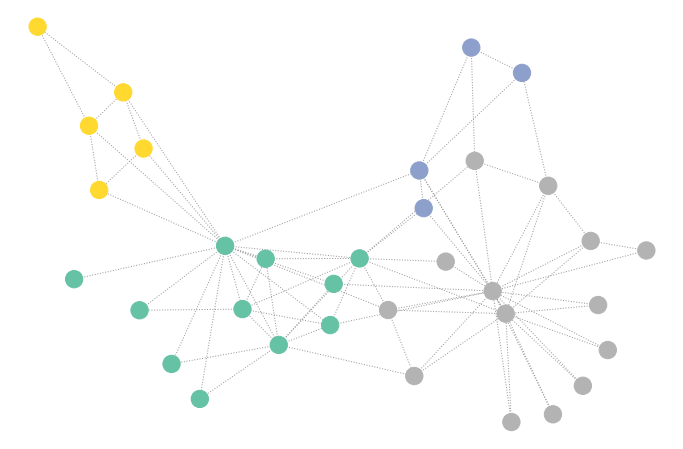

In [12]:
#_10

part = community.best_partition(karate_net, random_state=42)

layout = nx.fruchterman_reingold_layout(karate_net, seed=23)

colors = [part[n] for n in karate_net.nodes()]
my_colors = plt.cm.Set2

fig, ax = plt.subplots(figsize=(12,8))
nx.draw_networkx_nodes(karate_net, pos=layout, node_size=300, node_color=colors, cmap = my_colors) 
nx.draw_networkx_edges(karate_net, pos=layout, edge_color='#98989C', width=1, style='dotted')
plt.axis('off')

num_partitions = 4

# Store the result in the assignment variable
_10 = num_partitions # do not change this variable name

## Question 11:

<div class="alert alert-block alert-info">  
The K-cores method 'strips away' nodes from the network with a severity that increases alongside the chosen value of K. In this question, we're going to ask you to strip away layers from the Karate network until you feel you've identified the 'core' of the network, and then tell us what value of K you ultimately ended up using to accomplish this. Usually, identifying the 'core' would be a subjective call; with this question, however, there's only one justifiable answer!
</div>
<div class="alert alert-block alert-success">
Use K-Core decomposition and a variety of different values for K to extract what you view as the 'core' of the Karate Club network. Use visualizations of all of the K values you try to help you guide your search. Submit the integer value you used for K that was best at extracting the core of the network. 
</div>

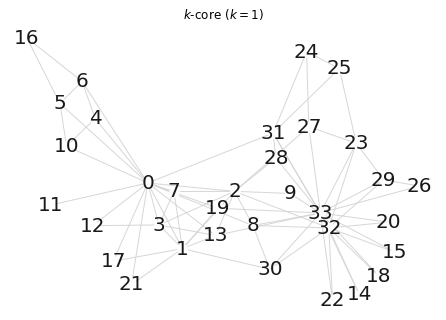

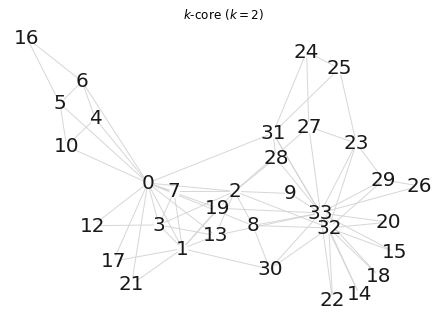

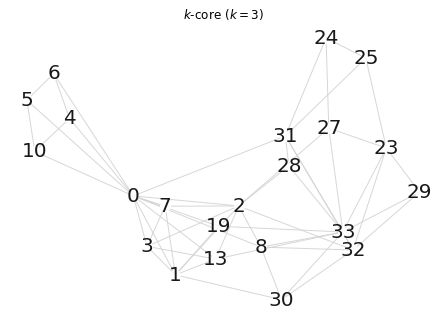

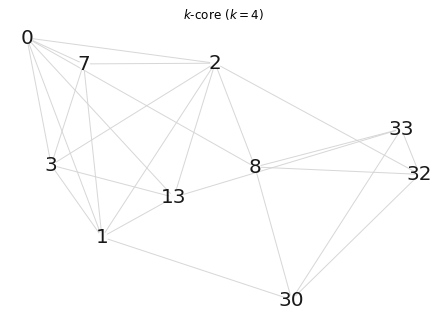

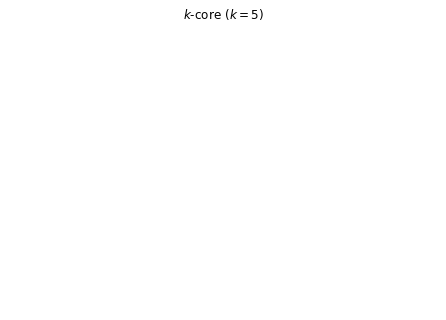

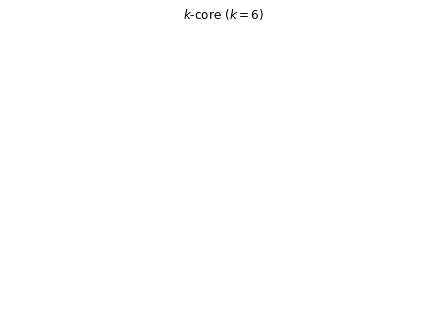

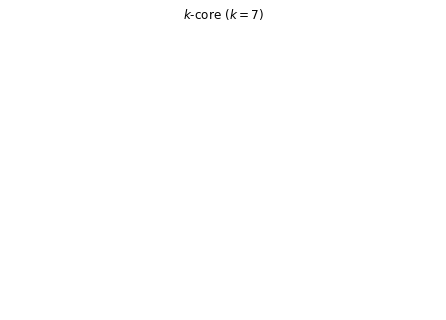

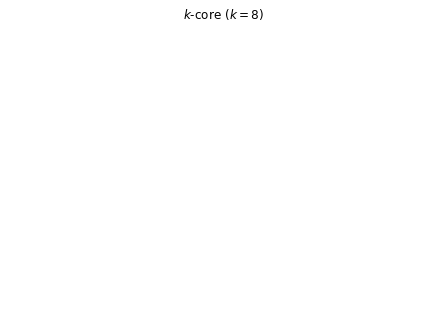

In [13]:
#_11

ks = [1,2,3,4,5,6,7,8]

for k in ks:
    kcore = nx.k_core(karate_net, k)
    nx.draw(kcore, pos = layout,
            with_labels = True, 
            node_color = 'white', 
            font_color = 'black', 
            edge_color = 'lightgray', 
            font_size = 20, alpha = .9, 
            node_size = 100)
    plt.title(f'$k$-core ($k={k}$)')
    plt.show()
    
best_k = 5  

# Store the result in the assignment variable
_11 = best_k # do not change this variable name

## Question 12:

<div class="alert alert-block alert-info">  
Finally, we arrive at structural equivalence and blockmodeling. Since most of the code for this question involves visualization, we're going to provide a bit more structure than we have over the past few questions. In return, we're expecting you to produce an insightful analysis about why the highest-level split involved separating the nodes in the way that it did.  
</div>
<div class="alert alert-block alert-success">
Develop a deterministic blockmodel of the Karate Club network. Visualize the blockmodel using a hierarchical clustering dendogram. In the resulting visualization, you should notice that the blockmodel's highest-order split separates the network into two very uneven groups, one containing 5 nodes, and one containing all of the other nodes in the network. Drawing upon your knowledge of what blockmodels represent, write between three and five sentences explaining why the 5 nodes in the smaller group were grouped together. Try to think of where you've seen those nodes before and what the previous questions might have told you about them. Be specific, use appropriate terminology, and make sure to include references to pertinent measures used elsewhere in this module.  
</div>

<ipython-input-14-63c720938d60>:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hlink = hierarchy.linkage(distances, 'ward')


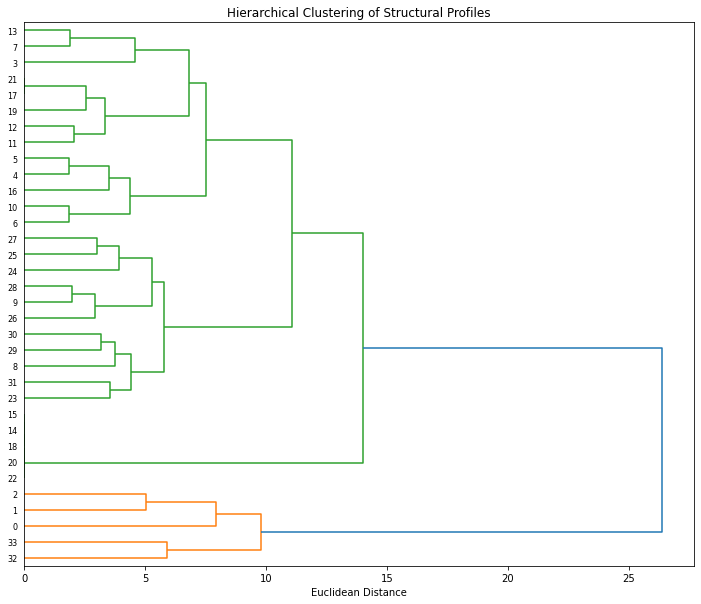

In [14]:
#_12

# Create Adjacency Matrix
ego_am = nx.adjacency_matrix(karate_net)

# Calculate Euclidean Distances
distances = euclidean_distances(ego_am)

hlink = hierarchy.linkage(distances, 'ward')

plt.figure(figsize=(12, 10))
plt.title('Hierarchical Clustering of Structural Profiles')
plt.xlabel('Euclidean Distance')

d = hierarchy.dendrogram(
    hlink,
    distance_sort=True,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=8,  # font size for the x axis labels
    orientation='right', 
    labels = [n for n in karate_net.nodes()])


# Store the result in the assignment variable
_12 = """
The 5 nodes in the smaller group are together due to their central position in the network (visualized with K-Core
Decomposition where k=5), as well as the fact that the nodes 0, 1, 2, 33, 32 all appear in the top 10 of both
degree and eigenvector centrality result sets. Compared with the other associated members shown in the larger
group (which are not prevalent in the core and score lower for connection strength), the removal of these
particular nodes would greatly impact the current structure of the network.
"""

In [15]:
## FINALIZE ASSIGNMENT

import pickle as pkl

module = 8

response_dict = {
    "student_id": student_id,
    "grad_student": "undergrad",
    "module": module,
    "responses": [
        _01,
        _02,
        _03,
        _04,
        _05,
        _06,
        _07,
        _08,
        _09,
        _10,
        _11,
        _12,
    ],
    "code_cells": In
}

module_string = f"module_{response_dict['module']}"
filename = f"{module_string}__student_{student_id}.pkl"

with open(f"./{filename}", 'wb') as stream:
    pkl.dump(response_dict, stream)